In [30]:
#Get Data From Wiki
import pandas as pd
import numpy as np


url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

class_="wikitable collapsible collapsed"
id="collapsibleTable4"
tmp = pd.read_html(io=url, attrs={"class":"wikitable collapsible collapsed"})
for i in tmp:
  first_column_title = i.columns[0]
  if first_column_title == 'Регіон':
    data = i
    break
  else:
    continue

In [31]:
#Вивести перші рядки таблиці за допомогою методу head

if data is not None:
    print(data.head())
else:
    print("No table with the desired column title found. Start first script to collect data!")

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [32]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
if data is not None:
    print(f'Кількість рядків: {data.shape[0]} та кількість стовпців: {data.shape[1]} у датафреймі! ')
else:
    print("No table with the desired column title found. Start first script to collect data!")

Кількість рядків: 28 та кількість стовпців: 9 у датафреймі! 


In [33]:
#Замініть у таблиці значення "—" на значення NaN

if data is not None:
    data.replace("—", np.nan, inplace=True)
    print(data)
else:
    print("No table with the desired column title found.")

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [34]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes

if data is not None:
    # print(data)
    print(data.dtypes)
else:
    print("No table with the desired column title found. Start first script to collect data!")

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [35]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
if data is not None:
  print(len(data))
  missing_ratio = data.isnull().sum() / len(data)
  print(missing_ratio)
else:
    print("No table with the desired column title found. Start first script to collect data!")


# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

if data is not None:
  for i in data.columns:
    if i != 'Регіон':
      data[i] = pd.to_numeric(data[i], errors='coerce')
      data[i].fillna(data[i].mean(), inplace=True)

  print(data)

else:
    print("No table with the desired column title found. Start first script to collect data!")


28
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64
               Регіон        1950        1960        1970  1990  2000  2012  \
0                Крим  230.000000  206.000000  160.000000   130    73   126   
1           Вінницька  224.000000  192.000000  142.000000   124    84   112   
2           Волинська  247.000000  250.000000  179.000000   153   112   148   
3    Дніпропетровська  204.000000  204.000000  151.000000   123    71   112   
4            Донецька  271.000000  214.000000  140.000000   109    61    98   
5         Житомирська  261.000000  223.000000  159.000000   129    89   122   
6        Закарпатська  314.000000  273.000000  207.000000   168   115   151   
7          Запорізька  219.000000  197.000000  150.000000   124    71   106   
8   Івано-Франківська  243.000000  248.000000  182.000000   155   103   124   
9            Київська

<Figure size 1200x800 with 0 Axes>

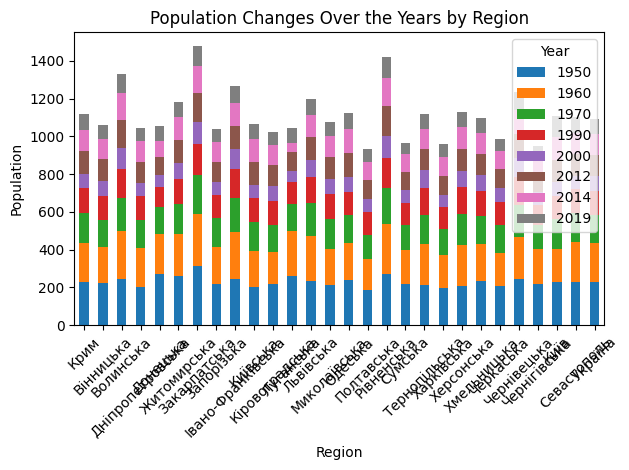

In [36]:
data.set_index('Регіон', inplace=True)
df = data.apply(pd.to_numeric)

# Plotting
plt.figure(figsize=(12, 8))
df.plot(kind='bar', stacked=True)
plt.title('Population Changes Over the Years by Region')
plt.xlabel('Region')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Year')
plt.show()

In [37]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
#Зроблено в попередній версіі
if data is not None:
  print(len(data))
  missing_ratio = data.isnull().sum() / len(data)
  print(missing_ratio)
else:
    print("No table with the desired column title found. Start first script to collect data!")

28
1950    0.0
1960    0.0
1970    0.0
1990    0.0
2000    0.0
2012    0.0
2014    0.0
2019    0.0
dtype: float64


In [39]:
import pandas as pd
import numpy as np


url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

class_="wikitable collapsible collapsed"
id="collapsibleTable4"
tmp = pd.read_html(io=url, attrs={"class":"wikitable collapsible collapsed"})
for i in tmp:
  first_column_title = i.columns[0]
  if first_column_title == 'Регіон':
    data = i
    break
  else:
    continue
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
if data is not None:
  data = data.drop(len(data) - 1)
  print(data)
else:
    print("No table with the desired column title found. Start first script to collect data!")


               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

<Figure size 1200x800 with 0 Axes>

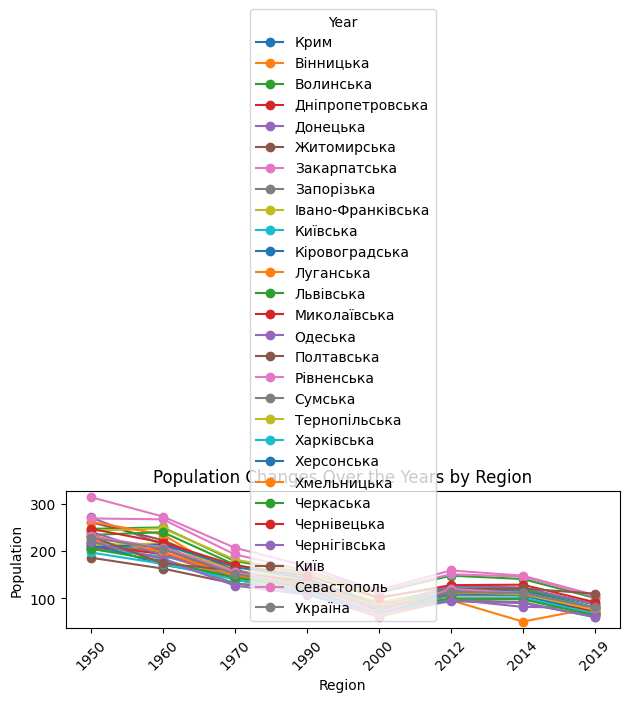

In [40]:
df = df.apply(pd.to_numeric)


plt.figure(figsize=(12, 8))
df.transpose().plot(marker='o', linestyle='-')
plt.title('Population Changes Over the Years by Region')
plt.xlabel('Region')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Year')
plt.show()

In [41]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
#Реалізовано вище в предпопередньому завданні!

if data is not None:
  for i in data.columns:
    if i != 'Регіон':
      data[i] = pd.to_numeric(data[i], errors='coerce')
      data[i].fillna(data[i].mean(), inplace=True)

  print(data)

else:
    print("No table with the desired column title found. Start first script to collect data!")


               Регіон    1950        1960   1970  1990  2000  2012    2014  \
0                Крим  230.00  206.000000  160.0   130    73   126  111.44   
1           Вінницька  224.00  192.000000  142.0   124    84   112  109.00   
2           Волинська  247.00  250.000000  179.0   153   112   148  141.00   
3    Дніпропетровська  204.00  204.000000  151.0   123    71   112  111.00   
4            Донецька  271.00  214.000000  140.0   109    61    98   82.00   
5         Житомирська  261.00  223.000000  159.0   129    89   122  120.00   
6        Закарпатська  314.00  273.000000  207.0   168   115   151  146.00   
7          Запорізька  219.00  197.000000  150.0   124    71   106  106.00   
8   Івано-Франківська  243.00  248.000000  182.0   155   103   124  122.00   
9            Київська  204.00  189.000000  156.0   123    73   122  121.00   
10     Кіровоградська  216.00  171.000000  145.0   126    79   110  108.00   
11          Луганська  262.00  235.000000  144.0   116    62    

In [42]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
if data is not None:

    average_birth_2019 = data['2019'].mean()
    print("Average Birth Rate in 2019:", average_birth_2019)
    regions_higher_than_average = data[data['2019'] > average_birth_2019][['Регіон','2019']]
    print(regions_higher_than_average.sort_values(by='2019', ascending=False))
else:
    print("No table with the desired column title found.")

Average Birth Rate in 2019: 80.17391304347828
               Регіон   2019
25               Київ  110.0
16         Рівненська  107.0
6        Закарпатська  104.0
2           Волинська  101.0
23        Чернівецька   92.0
8   Івано-Франківська   88.0
14            Одеська   88.0
12          Львівська   87.0
20         Херсонська   81.0


<Figure size 1000x600 with 0 Axes>

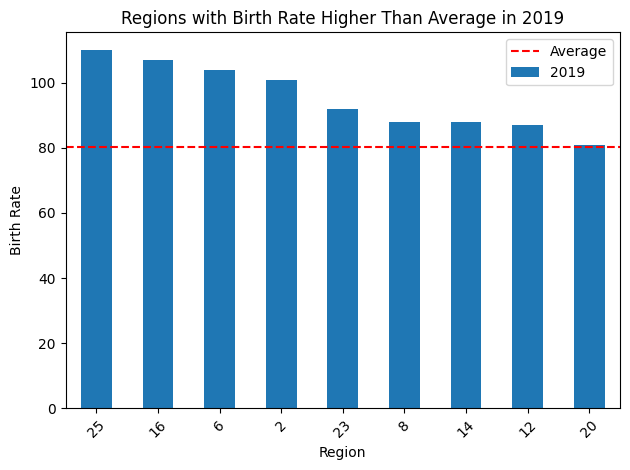

In [43]:
data_3 = regions_higher_than_average.sort_values(by='2019', ascending=False)
plt.figure(figsize=(10, 6))
data_3.plot(kind='bar', legend=False)
plt.axhline(y=average_birth_2019, color='r', linestyle='--', label='Average')
plt.title('Regions with Birth Rate Higher Than Average in 2019')
plt.xlabel('Region')
plt.ylabel('Birth Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
#У якому регіоні була найвища народжуваність у 2014 році?
if data is not None:

    highest_birth_rate_2014 = data['2014'].max()
    region_highest_birth_rate_2014 = data[data['2014'] == highest_birth_rate_2014]['Регіон'].values[0]
    print(f"Highest birth rate in 2014 was in: \'{region_highest_birth_rate_2014}\'state with Rate: {highest_birth_rate_2014}")

else:
    print("No table with the desired column title found.")

Highest birth rate in 2014 was in: 'Рівненська'state with Rate: 148.0


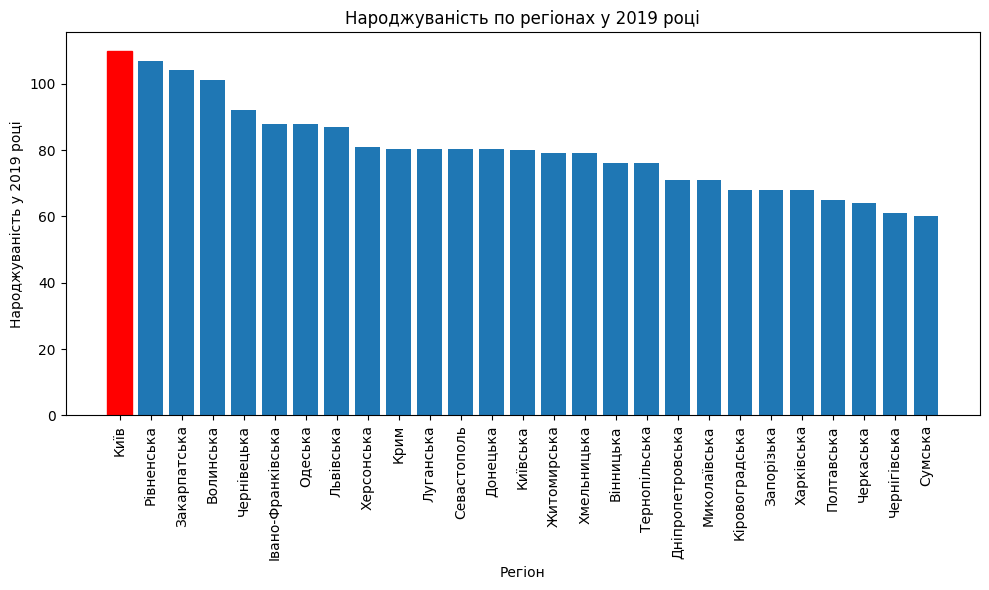

In [45]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt

if data is not None:
    birth_rates_2019 = data[['Регіон', '2019']].sort_values(by='2019', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(birth_rates_2019['Регіон'], birth_rates_2019['2019'])
    bars[0].set_color('red')
    plt.xlabel('Регіон')
    plt.ylabel('Народжуваність у 2019 році')
    plt.title('Народжуваність по регіонах у 2019 році')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No table with the desired column title found.")
